here will be capstone project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print ("Hello Capstone Project Course!")

Hello Capstone Project Course!


In [2]:
filename= "https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv"
df = pd.read_csv(filename)
df[['SEVERITYCODE', 'X','Y', 'ST_COLCODE','PERSONCOUNT', 'PEDCOUNT','PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE', 'WEATHER', 'ROADCOND', 'LIGHTCOND']]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,ST_COLCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,WEATHER,ROADCOND,LIGHTCOND
0,2,-122.323148,47.703140,10,2,0,0,2,2013/03/27 00:00:00+00,Overcast,Wet,Daylight
1,1,-122.347294,47.647172,11,2,0,0,2,2006/12/20 00:00:00+00,Raining,Wet,Dark - Street Lights On
2,1,-122.334540,47.607871,32,4,0,0,3,2004/11/18 00:00:00+00,Overcast,Dry,Daylight
3,1,-122.334803,47.604803,23,3,0,0,3,2013/03/29 00:00:00+00,Clear,Dry,Daylight
4,2,-122.306426,47.545739,10,2,0,0,2,2004/01/28 00:00:00+00,Raining,Wet,Daylight
...,...,...,...,...,...,...,...,...,...,...,...,...
194668,2,-122.290826,47.565408,24,3,0,0,2,2018/11/12 00:00:00+00,Clear,Dry,Daylight
194669,1,-122.344526,47.690924,13,2,0,0,2,2018/12/18 00:00:00+00,Raining,Wet,Daylight
194670,2,-122.306689,47.683047,28,3,0,0,2,2019/01/19 00:00:00+00,Clear,Dry,Daylight
194671,2,-122.355317,47.678734,5,2,0,1,1,2019/01/15 00:00:00+00,Clear,Dry,Dusk


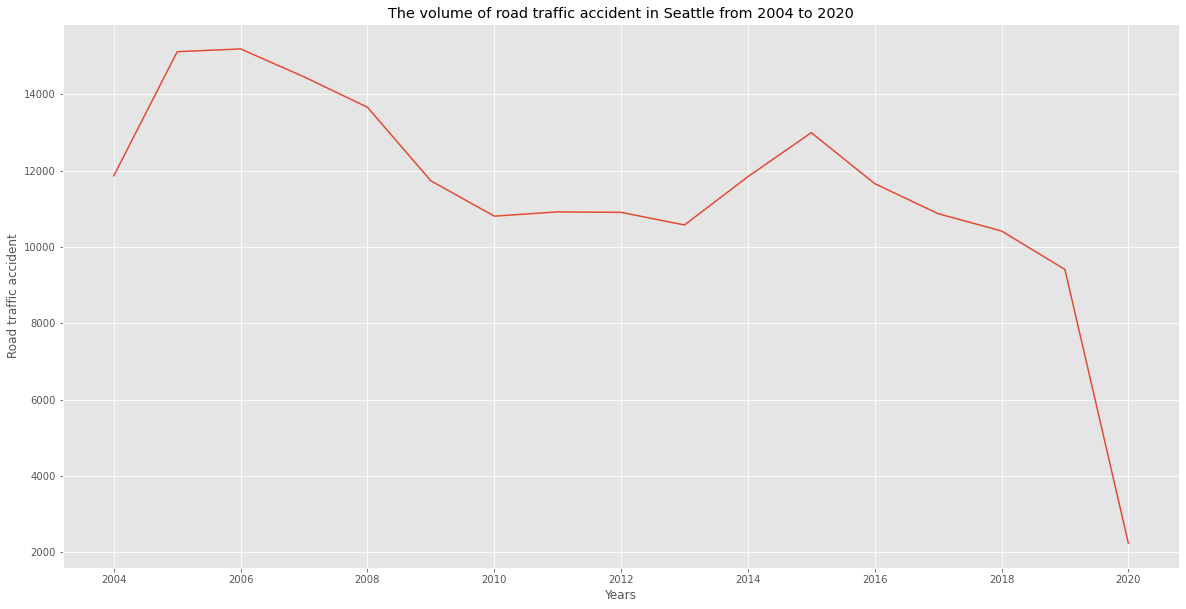

In [3]:
df.insert (10, "YEAR", True)
from datetime import datetime, date, time
df['YEAR']=df['INCDATE']
df['YEAR'] = pd.DatetimeIndex(df['YEAR']).year
df[['YEAR']]
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use(['ggplot'])
years = list(map(str, range(2004, 2021)))
Year_statistics=df['YEAR'].value_counts().to_frame()
Year_statistics.insert (1, "DATE", True)
Year_statistics['DATE']=[2006, 2005, 2007, 2008, 2015, 2004, 2014,2009, 2016, 2011, 2012, 2017, 2010, 2013, 2018, 2019, 2020]
Year_statistics = Year_statistics.set_index('DATE', append=True).sort_index(level=1).reset_index(level=1)
Year_statistics['YEAR'].plot(kind='line', figsize=(20,10))
plt.title('The volume of road traffic accident in Seattle from 2004 to 2020')
plt.ylabel('Road traffic accident')
plt.xlabel('Years')


plt.show() 



([<matplotlib.axis.XTick at 0x7fbe8d197e10>,
 [Text(0, 0, 'monday'),
  Text(1, 0, 'tuesday'),
  Text(2, 0, 'wednesday'),
  Text(3, 0, 'thursday'),
  Text(4, 0, 'friday'),
  Text(5, 0, 'saturday'),
  Text(6, 0, 'sunday')])

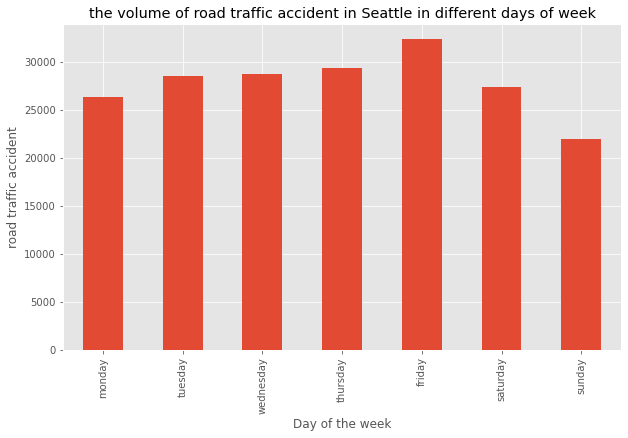

In [7]:
import calendar
from datetime import datetime, date, time
#df.insert(10, "WEEK_DAY", True) 
df['WEEK_DAY'] = df['INCDATE']
df.dropna(subset = ['WEEK_DAY'], inplace=True)
df['WEEK_DAY'] =  pd.to_datetime(df['WEEK_DAY'],
                             format='')
df['WEEK_DAY'] = df['WEEK_DAY'].apply(lambda x: x.weekday())
df[['WEEK_DAY','INCDATE']]
Week_statistics=df['WEEK_DAY'].value_counts().to_frame()
Week_statistics.insert (0, "DAYNUMBER", [4,3,2,1,5,0,6])
Week_statistics = Week_statistics.set_index('DAYNUMBER', append=True).sort_index(level=1).reset_index(level=1)
Week_statistics['DAYNUMBER']=["monday", "tuesday", "wednesday", "thursday", "friday", "saturday", "sunday"]
Week_statistics['WEEK_DAY'].plot(kind='bar', figsize=(10,6))
plt.title('the volume of road traffic accident in Seattle in different days of week')
plt.ylabel('road traffic accident')
plt.xlabel('Day of the week')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday'])



In [8]:
df.dropna(subset = ['ST_COLCODE'], inplace=True)
COLDESC=df['ST_COLDESC'].value_counts().to_frame()
COLDESC.head (15)

,ST_COLDESC
One parked--one moving,44421
Entering at angle,34674
From same direction - both going straight - one stopped - rear-end,25771
Fixed object,13554
From same direction - both going straight - both moving - sideswipe,12777
From opposite direction - one left turn - one straight,10324
From same direction - both going straight - both moving - rear-end,7629
Vehicle - Pedalcyclist,4701
From same direction - all others,4537
From same direction - one left turn - one straight,3093


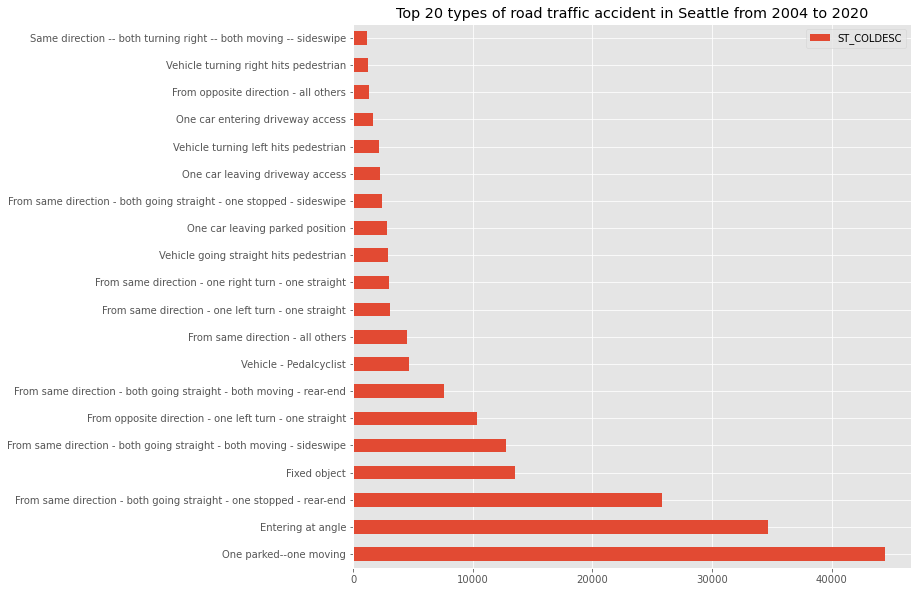

In [9]:
COLDESC.head(20).plot(kind='barh', figsize=(10, 10))

plt.title('Top 20 types of road traffic accident in Seattle from 2004 to 2020')

plt.show()

In [ ]:
df.dropna(subset = ['X'], inplace=True)
df.dropna(subset = ['Y'], inplace=True)
df = df.set_index('SEVERITYCODE', append=True).sort_index(level=1).reset_index(level=1)
df['SEVERITYCODE'].value_counts().to_frame()
SEV1=df.head(132216)
SEV2=df.tail(57105)
SEV1=SEV1.set_index('PEDCOUNT', append=True).sort_index(level=1).reset_index(level=1)
SEV1['PEDCOUNT'].value_counts().to_frame()
SEV1_0=SEV1.head(131520)
SEV1_YES=SEV1[131521:132217]
SEV1_1=SEV1.iloc[131521:132197]
SEV1_2=SEV1.iloc[132197:132215]
SEV1_3=SEV1.tail(1)
SEV2=SEV2.set_index('PEDCOUNT', append=True).sort_index(level=1).reset_index(level=1)
SEV2['PEDCOUNT'].value_counts().to_frame()
SEV2_0=SEV2.head(50922)
SEV2_YES=SEV2.iloc[50923: 57106]
SEV2_1=SEV2.iloc[50923:56872]
SEV2_2=SEV2.iloc[56872:57078]
SEV2_36=SEV2.tail(28)
SEV2_2

No handles with labels found to put in legend.


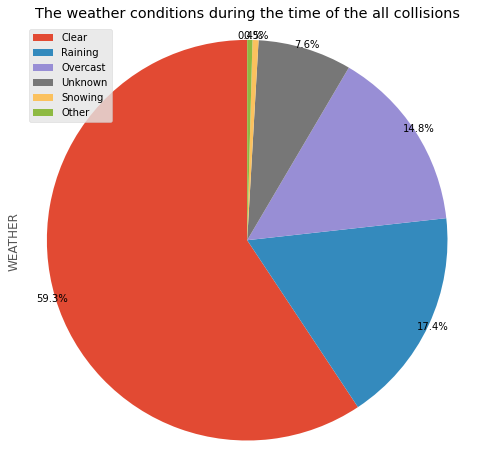

No handles with labels found to put in legend.


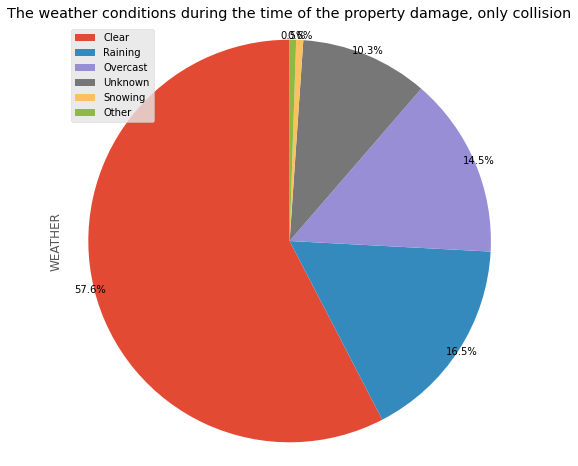

No handles with labels found to put in legend.


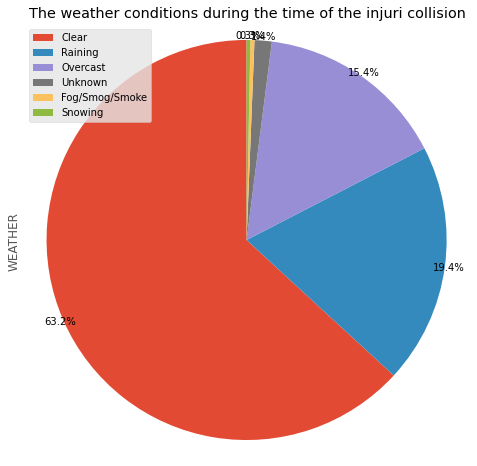

In [42]:

dfweather=df['WEATHER'].value_counts().to_frame()
dfweather.head(6).plot(kind='pie',
                            figsize=(8,8),
                            autopct='%1.1f%%',
                            startangle=90,    
                            labels=None, 
                            subplots=True,
                            pctdistance=1.02)

plt.title('The weather conditions during the time of the all collisions')
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.legend(labels=dfweather.index, loc='upper left') 
plt.show()

SEV1W=SEV1['WEATHER'].value_counts().to_frame()
SEV1W.head(6).plot(kind='pie',
                            figsize=(8,8),
                            autopct='%1.1f%%',
                            startangle=90,    
                            labels=None, 
                            subplots=True,
                            pctdistance=1.02)

plt.title('The weather conditions during the time of the property damage, only collision')
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.legend(labels=SEV1W.index, loc='upper left') 
plt.show()
SEV2W=SEV2['WEATHER'].value_counts().to_frame()
SEV2W.head(6).plot(kind='pie',
                            figsize=(8,8),
                            autopct='%1.1f%%',
                            startangle=90,    
                            labels=None, 
                            subplots=True,
                            pctdistance=1.02)

plt.title('The weather conditions during the time of the injuri collision')
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.legend(labels=SEV2W.index, loc='upper left') 
plt.show()

No handles with labels found to put in legend.


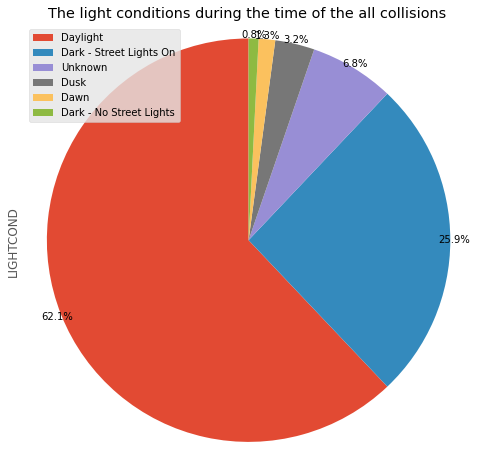

No handles with labels found to put in legend.


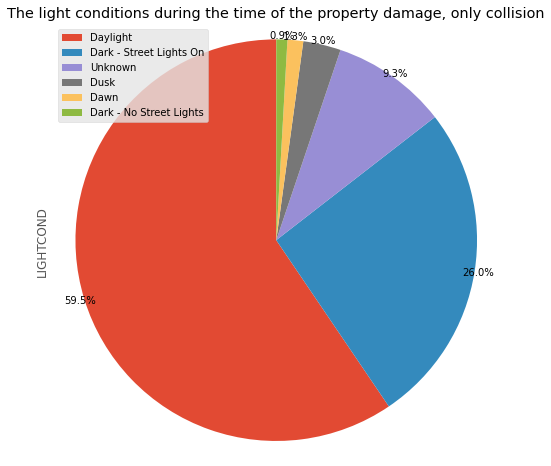

No handles with labels found to put in legend.


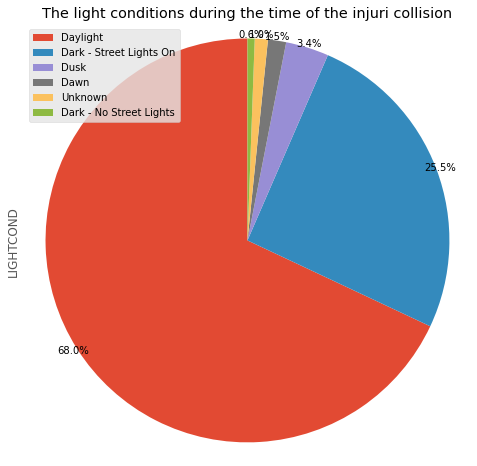

In [44]:
dflight=df['LIGHTCOND'].value_counts().to_frame()
dflight.head(6).plot(kind='pie',
                            figsize=(8,8),
                            autopct='%1.1f%%',
                            startangle=90,    
                            labels=None, 
                            subplots=True,
                            pctdistance=1.02)

plt.title('The light conditions during the time of the all collisions')
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.legend(labels=dflight.index, loc='upper left') 
plt.show()

SEV1L=SEV1['LIGHTCOND'].value_counts().to_frame()
SEV1L.head(6).plot(kind='pie',
                            figsize=(8,8),
                            autopct='%1.1f%%',
                            startangle=90,    
                            labels=None, 
                            subplots=True,
                            pctdistance=1.02)

plt.title('The light conditions during the time of the property damage, only collision')
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.legend(labels=SEV1L.index, loc='upper left') 
plt.show()
SEV2L=SEV2['LIGHTCOND'].value_counts().to_frame()
SEV2L.head(6).plot(kind='pie',
                            figsize=(8,8),
                            autopct='%1.1f%%',
                            startangle=90,    
                            labels=None, 
                            subplots=True,
                            pctdistance=1.02)

plt.title('The light conditions during the time of the injuri collision')
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.legend(labels=SEV2L.index, loc='upper left') 
plt.show()

No handles with labels found to put in legend.


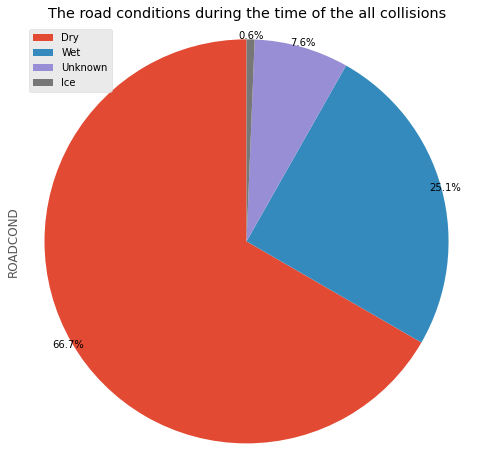

No handles with labels found to put in legend.


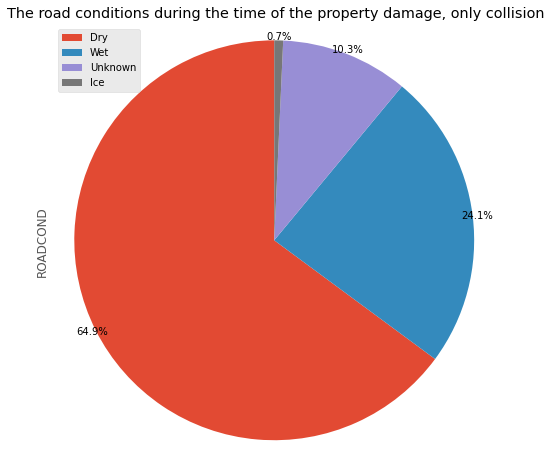

No handles with labels found to put in legend.


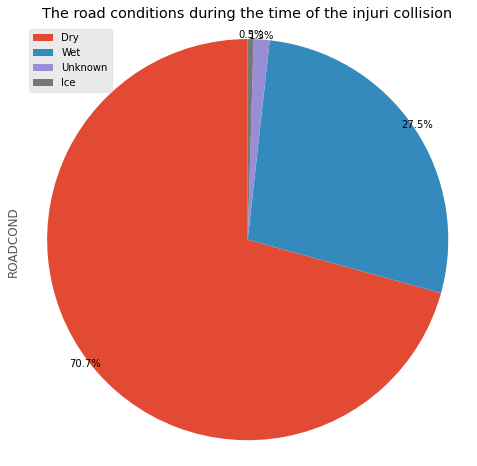

In [46]:
dfroad=df['ROADCOND'].value_counts().to_frame()
dfroad.head(4).plot(kind='pie',
                            figsize=(8,8),
                            autopct='%1.1f%%',
                            startangle=90,    
                            labels=None, 
                            subplots=True,
                            pctdistance=1.02)

plt.title('The road conditions during the time of the all collisions')
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.legend(labels=dfroad.index, loc='upper left') 
plt.show()

SEV1R=SEV1['ROADCOND'].value_counts().to_frame()
SEV1R.head(4).plot(kind='pie',
                            figsize=(8,8),
                            autopct='%1.1f%%',
                            startangle=90,    
                            labels=None, 
                            subplots=True,
                            pctdistance=1.02)

plt.title('The road conditions during the time of the property damage, only collision')
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.legend(labels=SEV1R.index, loc='upper left') 
plt.show()
SEV2R=SEV2['ROADCOND'].value_counts().to_frame()
SEV2R.head(4).plot(kind='pie',
                            figsize=(8,8),
                            autopct='%1.1f%%',
                            startangle=90,    
                            labels=None, 
                            subplots=True,
                            pctdistance=1.02)

plt.title('The road conditions during the time of the injuri collision')
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.legend(labels=SEV2R.index, loc='upper left') 
plt.show()

In [133]:
from sklearn.tree import DecisionTreeClassifier
 
df_tree=df[['SEVERITYCODE','PEDCOUNT', 'WEEK_DAY', 'ROADCOND','LIGHTCOND','WEATHER', 'PEDCYLCOUNT', 'VEHCOUNT', 'ST_COLCODE']]
df_tree.dropna(subset = ['SEVERITYCODE'], inplace=True)
df_tree.dropna(subset = ['PEDCOUNT'], inplace=True)
df_tree.dropna(subset = ['WEEK_DAY'], inplace=True)
df_tree.dropna(subset = ['ROADCOND'], inplace=True)
df_tree.dropna(subset = ['LIGHTCOND'], inplace=True)
df_tree.dropna(subset = ['WEATHER'], inplace=True)
df_tree.dropna(subset = ['PEDCYLCOUNT'], inplace=True)
df_tree.dropna(subset = ['VEHCOUNT'], inplace=True)
df_tree.dropna(subset = ['ST_COLCODE'], inplace=True)
df_tree['WEATHER'].value_counts()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

Clear                       108828
Raining                      31980
Overcast                     27099
Unknown                      13846
Snowing                        888
Other                          765
Fog/Smog/Smoke                 553
Sleet/Hail/Freezing Rain       112
Blowing Sand/Dirt               49
Severe Crosswind                24
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [148]:
from sklearn import preprocessing
X = df_tree[['PEDCOUNT', 'WEEK_DAY','ROADCOND','WEATHER','LIGHTCOND', 'PEDCYLCOUNT', 'VEHCOUNT', 'ST_COLCODE']].values

le_ROAD = preprocessing.LabelEncoder()
le_ROAD.fit(['Dry', 'Wet', 'Unknown','Ice','Snow/Slush','Other','Standing Water','Sand/Mud/Dirt','Oil'])
X[:,4] = le_ROAD.transform(X[:,4]) 

le_WEATHER = preprocessing.LabelEncoder()
le_WEATHER.fit([ 'Raining', 'Clear','Overcast','Unknown','Snowing','Other','Fog/Smog/Smoke ',
             'Sleet/Hail/Freezing Rain','Blowing Sand/Dirt ','Severe Crosswind','Partly Cloudy'])
X[:,5] = le_WEATHER.transform(X[:,5])

le_LIGHT = preprocessing.LabelEncoder()
le_LIGHT.fit(['Dark - Street Lights On','Daylight','Unknown','Dusk','Dawn','Dark - No Street Lights',
           'Dark - Street Lights Off','Other ','Dark - Unknown Lighting '])
X[:,6] = le_LIGHT.transform(X[:,6])

y = df_tree['SEVERITYCODE']

X[0:5]
#X_trainset, X_testset, y_trainset, y_testset = df_tree(X, y, test_size=0.3, random_state=3)
#SEVTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
#SEVTree 

ValueError: y contains previously unseen labels: 'Dark - Street Lights On'

In [ ]:
conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

In [ ]:
dot_data = StringIO()
filename = "SEV_tree.png"
featureNames = SEV_tree.columns[0:5]
targetNames = SEV_tree["SEV"].unique().tolist()
out=tree.export_graphviz(SEV_tree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

In [84]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    attrs-20.2.0               |     pyh9f0ad1d_0          41 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    brotlipy-0.7.0             |py36h8c4c3a4_1000         346 KB  conda-forge
    chardet-3.0.4              |py36h9f0ad1d_1006         188 KB  conda-forge
    cryptography-3.1           |   py36h45558ae

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N


In [88]:
limit1 = 300
limitSEV2_YES= 16
limitSEV2_0=114
limitSEV1_YES=1
limitSEV1_0=169
SEV1_0MAP=df.iloc[0:limitSEV1_0, :]
SEV1_YESMAP=df.iloc[0:limitSEV1_YES, :]
SEV2_0MAP=df.iloc[0:limitSEV2_0, :]
SEV2_YESMAP=df.iloc[0:limitSEV2_YES, :]

,PEDCOUNT
0,131520
1,676
2,19
3,1


In [104]:
seattle_map = folium.Map(location=[47.622906, -122.345574], zoom_start=11)
seattle_map

incidents = folium.map.FeatureGroup()


for lat, lng, in zip(SEV1_0MAP.Y, SEV1_0MAP.X):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='lightblue',
            fill=True,
            fill_color='green',
            fill_opacity=1
        )
    )


for lat, lng, in zip(SEV2_0MAP.Y, SEV2_0MAP.X):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='green',
            fill_opacity=1
        )
    )
for lat, lng, in zip(SEV1_YESMAP.Y, SEV1_YESMAP.X):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='lightblue',
            fill=True,
            fill_color='red',
            fill_opacity=1
        )
    )
for lat, lng, in zip(SEV2_YESMAP.Y, SEV2_YESMAP.X):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='red',
            fill_opacity=1
        )
    )


# add incidents to map
seattle_map.add_child(incidents)

In [ ]:
from folium import plugins
limit2 =10000
df2=df.iloc[0:limit2, :]
seattle_map2 = folium.Map(location=[47.622906, -122.345574], zoom_start=11)
seattle_map2

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(seattle_map2)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df2.Y, df2.X, df2.SEVERITYDESC):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

# display map
seattle_map2